# EDA of Default Credit Data Set

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import simplefilter
simplefilter(action = "ignore", category = (FutureWarning, DeprecationWarning, UserWarning))

In [2]:
# Set up the palette as color blind friendly 
sns.set_style("whitegrid", {'axes.grid' : True})
sns.set_palette("Set2")

### Data loading and transformation

In [3]:
credit_data = pd.read_excel("default_of_credit_card_clients.xls", skiprows = 1)

In [4]:
credit_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [6]:
credit_data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
# Find the number of unique elements in each column
print (credit_data.apply(lambda x: x.nunique()))

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64


In [8]:
# Rename the columns
columns = ["id", "overall_credit", "gender", "education", "marital_status",
           "age", "rps_sept", "rps_aug", "rps_july","rps_june","rps_may",
           "rps_april", "ba_sept", "ba_aug", "ba_july", "ba_june", "ba_april",
           "ba_may", "pp_sept", "pp_aug", "pp_july", "pp_june", "pp_may", 
           "pp_april", "defaultp_next_month"]

In [9]:
credit_data.columns = columns

In [10]:
# Renaming the value for ease of understanding and assigning unknown values 5, 6 to others
credit_data['education'] = credit_data['education'].map({0: 'others',
                                                         5: 'others',
                                                         6: 'others',
                                                         4: 'others',
                                                         1: 'graduate_school',
                                                         2: 'university',
                                                         3: 'high_school'})

In [11]:
# Dropping the id column
credit_data.drop('id', axis=1, inplace=True)

In [12]:
credit_data.head()

,overall_credit,gender,education,marital_status,age,rps_sept,rps_aug,rps_july,rps_june,rps_may,...,ba_june,ba_april,ba_may,pp_sept,pp_aug,pp_july,pp_june,pp_may,pp_april,defaultp_next_month
0,20000,2,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [13]:
eda_credit_data = credit_data

In [14]:
# There is no description for 0 so treating it hass other marital status
eda_credit_data['marital_status'] = eda_credit_data['marital_status'].map({1: 'married',
                                                                           2: 'single',
                                                                           3: 'others',
                                                                           0: 'others'})

In [15]:
# Transforming data to get more sense
eda_credit_data['gender'] = eda_credit_data['gender'].map({1: 'male',
                                                           2: 'female'})

### Data Visualization

Text(0.5,1,'Correlation Heatmap')

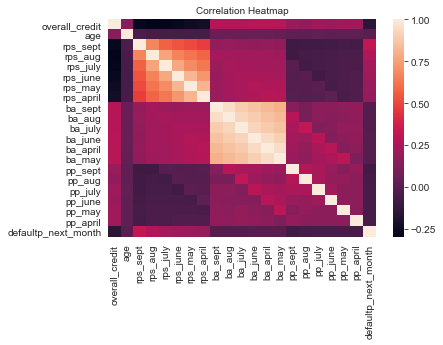

In [16]:
# Heatmap of correlation
corr = credit_data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.title( "Correlation Heatmap", fontsize = 10 )

##### From this corelation heatmap we can see that none of our feature variable are highly corelated to class variable(default payment in next month). We also observe that Repayment status for different months are highly corelated and bill amount for different months are highly corelated

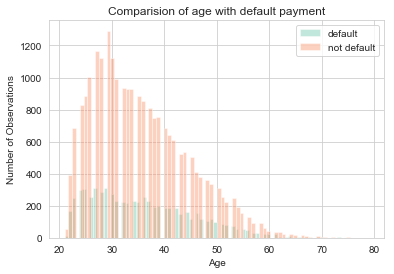

In [17]:
sns.distplot(a = eda_credit_data["age"][eda_credit_data["defaultp_next_month"] == 1],
             kde = False, norm_hist = False, label = "default", bins = 80)
sns.distplot(a = eda_credit_data["age"][eda_credit_data["defaultp_next_month"] == 0],
             kde = False, norm_hist = False, label = "not default", bins = 80)
plt.title("Distribution of people's age who are at default")
plt.xlabel('Age')
plt.ylabel('Number of Observations')
plt.title("Comparision of age with default payment")
plt.legend()
plt.show()

##### The age distribution of our dataset is right skewed.Most of the people in the dataset are between 25 - 40 year group. The ratio of defaulters and non defaulters for age group looks constant across all the ages 

[Text(0,0.5,'Default payment next month'), Text(0.5,0,'Education')]

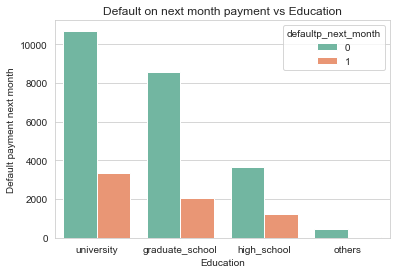

In [18]:
ax = sns.countplot(x = "education",
                   hue = "defaultp_next_month",
                   data = eda_credit_data)
plt.title("Default on next month payment vs Education")
ax.set(xlabel='Education', ylabel='Default payment next month')


##### From this graph we see that education level doesn't help us is determining defaulters. 

[Text(0,0.5,'Default payment next month'), Text(0.5,0,'Gender')]

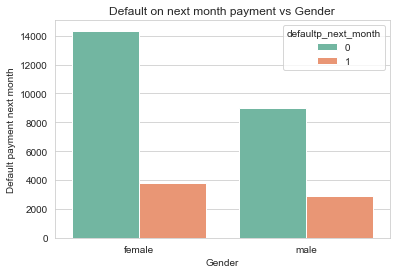

In [19]:
ax = sns.countplot(x = "gender",
                   hue = "defaultp_next_month", data = eda_credit_data)
plt.title("Default on next month payment vs Gender")
ax.set(xlabel='Gender', ylabel='Default payment next month')


##### The number of females in out dataset is higher than male but the ratio of defaulters across gender also looks constant

[Text(0,0.5,'Default payment next month'), Text(0.5,0,'Education')]

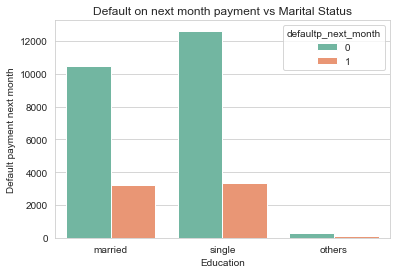

In [20]:
ax = sns.countplot(x = "marital_status",
                   hue = "defaultp_next_month", data = eda_credit_data)
plt.title("Default on next month payment vs Marital Status")
ax.set(xlabel='Education', ylabel='Default payment next month')


##### From this graph we can see that married people have defaulted more then single people. 

In [21]:
# g = sns.FacetGrid(data = eda_credit_data, row = 'defaultp_next_month', sharex = False, sharey = False, aspect = 2.5)
# g.map_dataframe(countplot, 'education', hue = 'gender')
# g.add_legend()

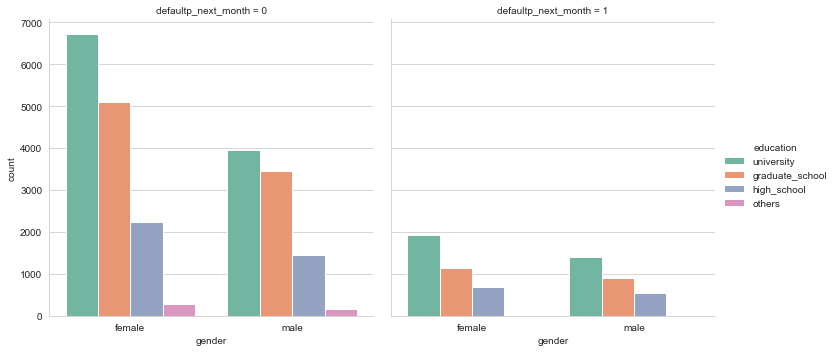

In [22]:
ax = sns.catplot(x = "gender", hue = "education", 
            col = "defaultp_next_month",
            data = eda_credit_data, kind = "count")

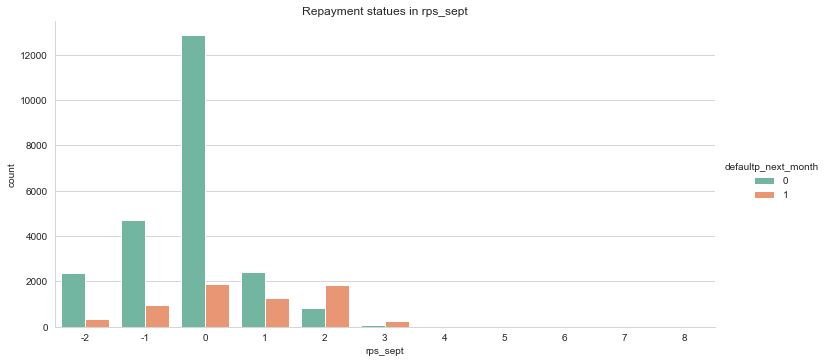

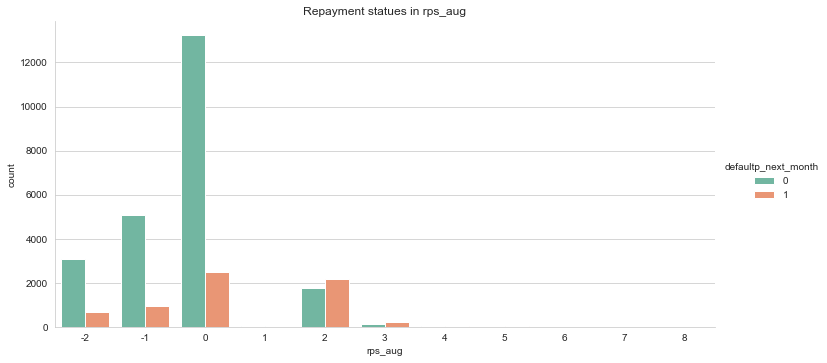

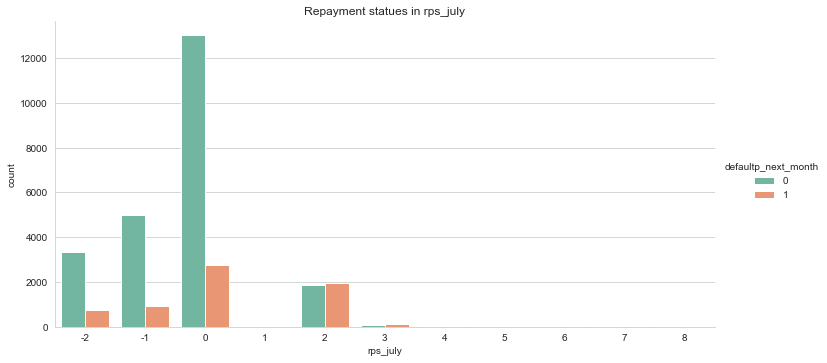

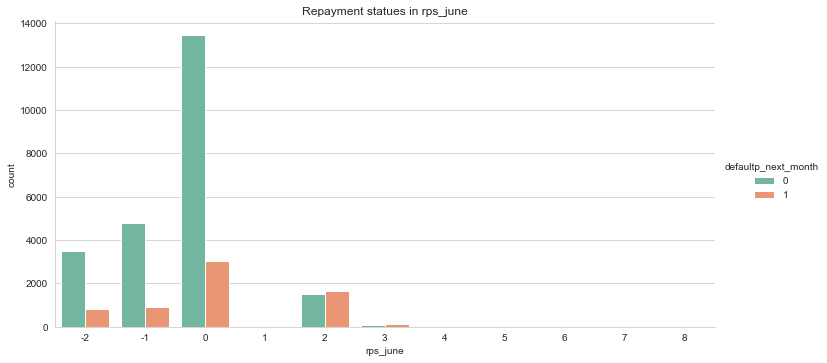

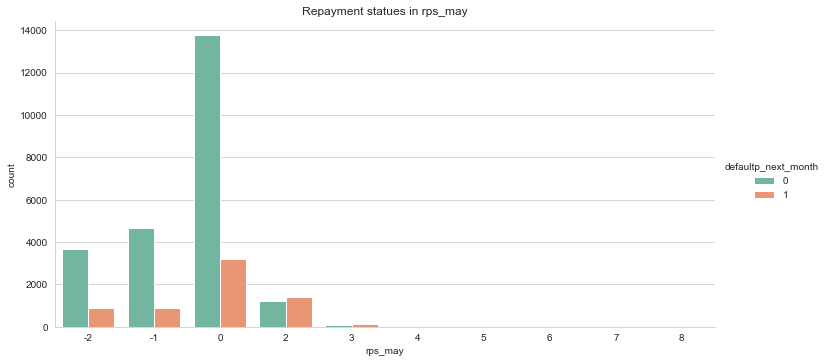

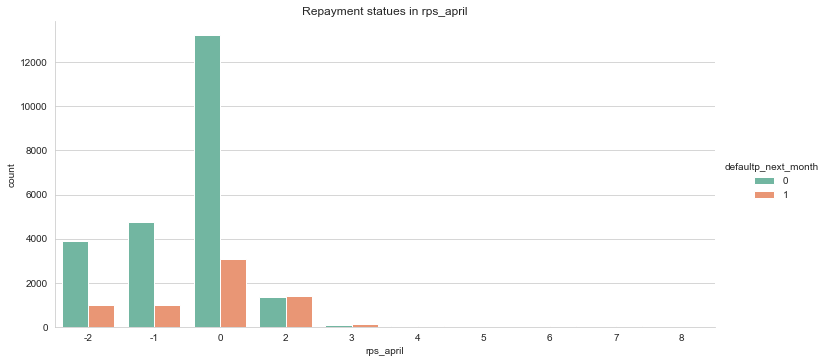

In [23]:
for column in credit_data.columns[5:11]:
    ax = sns.catplot(x = column, hue = "defaultp_next_month",
                data = eda_credit_data, kind = "count",
                 aspect = 2, height = 5)
    plt.title("Repayment statues in " + column)

##### From this repayment status we can observe that people who have delayed their payment for 2 months have in general higher probability of defaulting then no defaulting. We also find that for the month of may and april there are no datapoints where the repayment status is delayed for a month. Also, for month june july and august there are unusually less data points for 1 month delay in repaying the bill

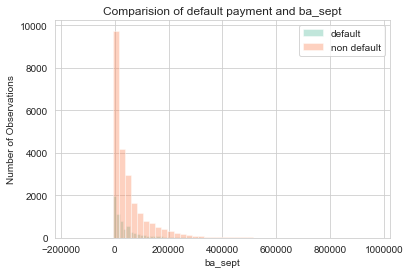

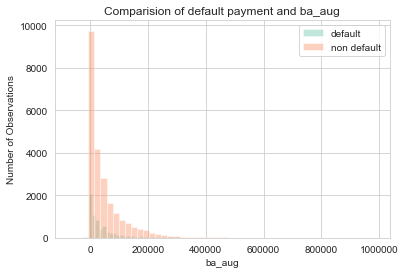

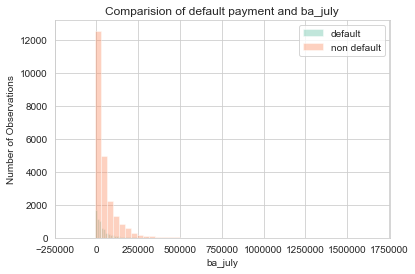

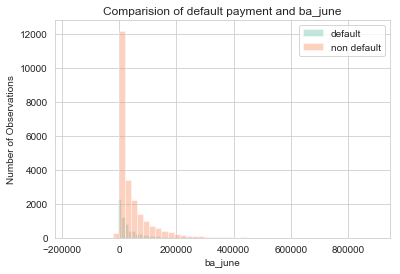

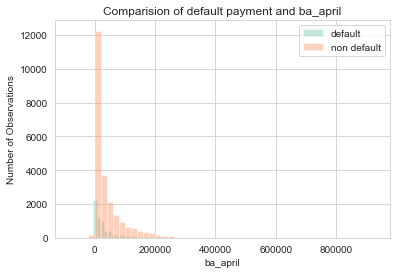

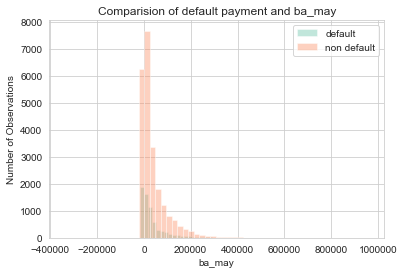

In [24]:
for column in credit_data.columns[11:17]:
    sns.distplot(a = eda_credit_data[column][eda_credit_data["defaultp_next_month"] == 1],
                 kde = False, norm_hist = False, label = "default")
    sns.distplot(a = eda_credit_data[column][eda_credit_data["defaultp_next_month"] == 0],
                 kde = False, norm_hist = False, label = "non default")
    plt.xlabel(column)
    plt.ylabel('Number of Observations')
    plt.title("Comparision of default payment and " + column)
    plt.legend()
    plt.show()


##### Bill amount and defaulters look constant across all the months. Although we find out some anomolies in bill amount. (Bill amount is negative)

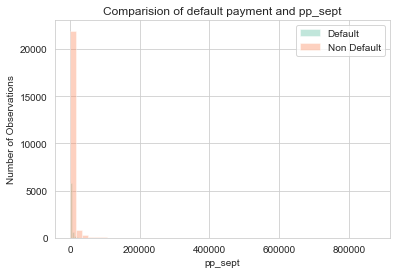

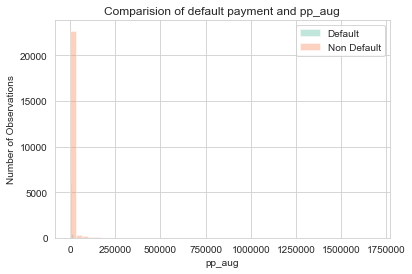

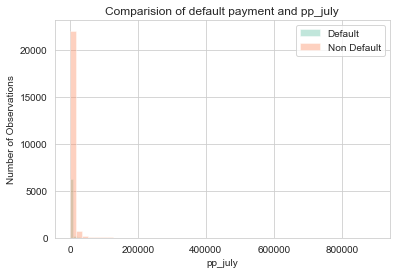

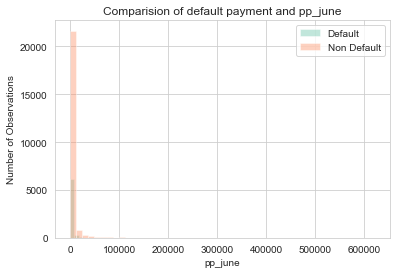

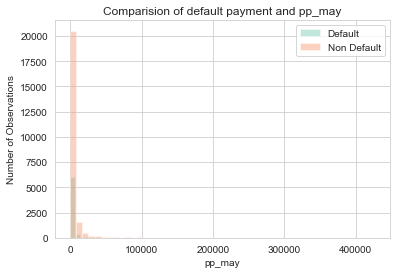

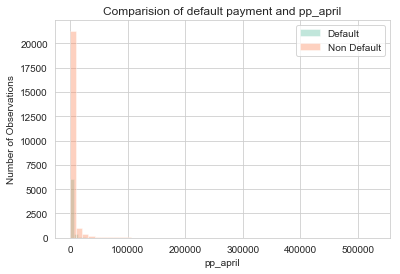

In [25]:
for column in credit_data.columns[17:23]:
    sns.distplot(a = eda_credit_data.loc[eda_credit_data['defaultp_next_month'] == 1, column],
                 kde = False, norm_hist = False, label = "Default")
    sns.distplot(a = eda_credit_data.loc[eda_credit_data['defaultp_next_month'] == 0, column],
                 kde = False, norm_hist = False, label = "Non Default")     
    plt.xlabel(column)
    plt.ylabel('Number of Observations')
    plt.title("Comparision of default payment and " + column)
    plt.legend()
    plt.show()

##### Paid amount and defaulters look constant across all the months. Although the bill amount and paid amount for different months does'nt have a matching trend. There are more number of people who recieved high credit card bill (> 100k) but the number of people who paid amount high amount bill (> 100k) is less.

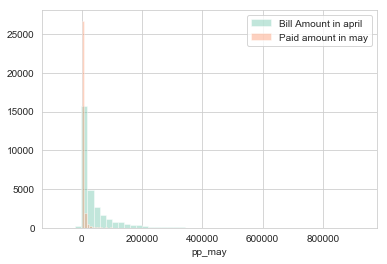

In [26]:
sns.distplot(a = eda_credit_data["ba_april"],
            kde = False, norm_hist = False, label = "Bill Amount in april")
sns.distplot(a = eda_credit_data["pp_may"],
             kde = False, norm_hist = False, label = "Paid amount in may")
plt.legend()
plt.show()

##### This graph confirms are above observation

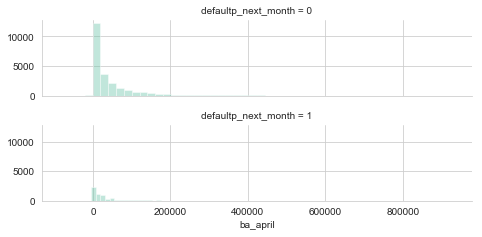

In [27]:
g = sns.FacetGrid(eda_credit_data, row="defaultp_next_month",
                  height=1.7, aspect=4,)
g.map(sns.distplot, "ba_april", kde = False, norm_hist = False)

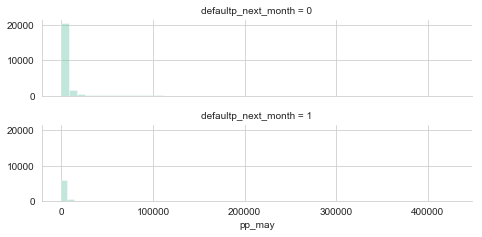

In [28]:
g = sns.FacetGrid(eda_credit_data, row="defaultp_next_month",
                  height=1.7, aspect=4,)
g.map(sns.distplot, "pp_may", kde = False, norm_hist = False)

### Anamoly detection

In [29]:
all_rps_delayed = eda_credit_data.loc[(eda_credit_data['rps_sept'] > 0) & (eda_credit_data['rps_aug'] > 0) &
                    (eda_credit_data['rps_july'] > 0) & (eda_credit_data['rps_june'] > 0) &
                    (eda_credit_data['rps_april'] > 0) & (eda_credit_data['rps_may'] > 0)]

In [30]:
any_rps_delayed = eda_credit_data.loc[(eda_credit_data['rps_sept'] > 0) | (eda_credit_data['rps_aug'] > 0) |
                    (eda_credit_data['rps_july'] > 0) | (eda_credit_data['rps_june'] > 0) |
                    (eda_credit_data['rps_april'] > 0) | (eda_credit_data['rps_may'] > 0)]

Text(0.5,1,'All delayed repayment status')

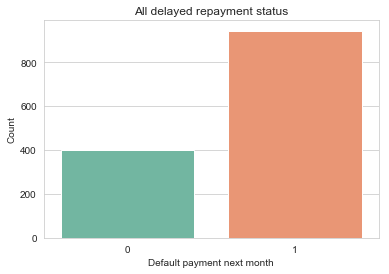

In [31]:
ax = sns.countplot(x = "defaultp_next_month", data = all_rps_delayed)
ax.set(xlabel='Default payment next month', ylabel='Count')
plt.title("All delayed repayment status")

##### The above graph plots the data where the users have delayed their payment status for every month. All those accounts should be defaulters but some 400 accounts are assigned not default. 

Text(0.5,1,'One delayed payment status for account vs Default')

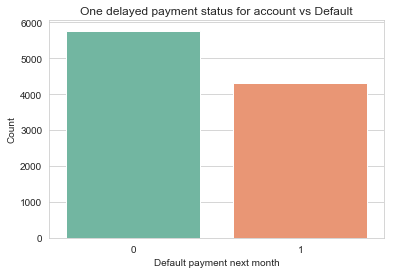

In [32]:
ax = sns.countplot(x = "defaultp_next_month", data = any_rps_delayed)
ax.set(xlabel='Default payment next month', ylabel='Count')
plt.title("One delayed payment status for account vs Default")

In [33]:
any_rps_delayed["defaultp_next_month"].value_counts()[1] / any_rps_delayed["defaultp_next_month"].count() *  100

42.72519614658854

##### The above graph plots the data where the users have delayed their payment status for any month. From this graph we can say that even if an account defaults in a month the probabilty that the bank assigns him defaulter is less (42%)

In [34]:
balance_may = eda_credit_data["ba_april"] - eda_credit_data["pp_may"] 
balance_may.head(10)

0         0
1      3455
2     13948
3     27890
4     18457
5     18619
6    469253
7     -1846
8     10793
9     11885
dtype: int64

In [35]:
eda_credit_data["rps_may"].head(10)

0   -2
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9   -1
Name: rps_may, dtype: int64

##### From the above dataframe values we can see some anomolies. For index 7 the person has paid more money then bill amount but his repayment status does not reflect that (it should be -1, paid in full, instead of 0, use of revolving credit)

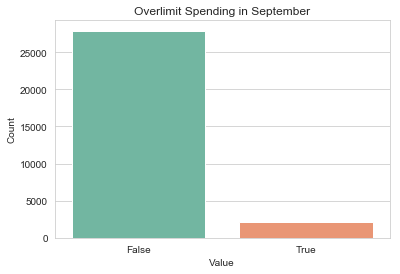

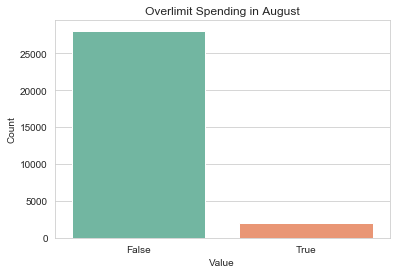

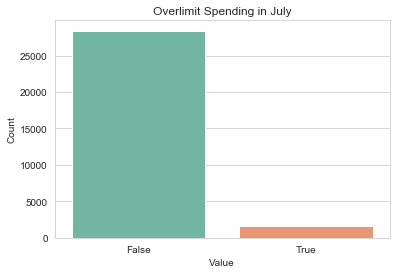

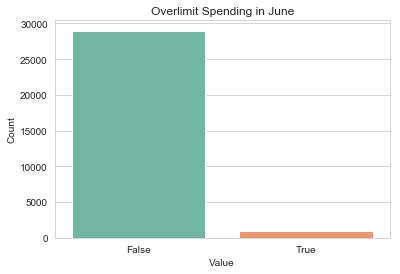

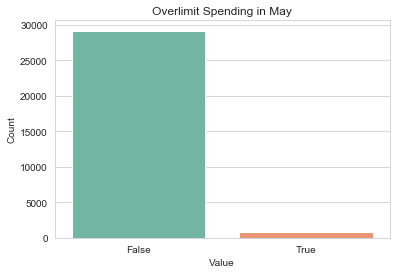

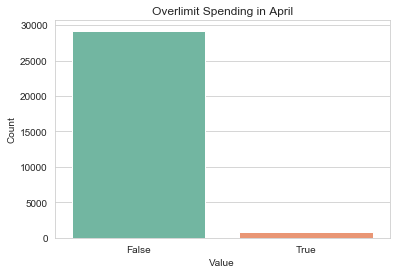

In [36]:
overlimit_spending  = pd.DataFrame()
for ba in credit_data.columns[11:17]:
    val = ''
    s_month = credit_data["overall_credit"] - credit_data[ba]
    anom_month = s_month < 0
    val = ba + "_anom"
    overlimit_spending[val] = anom_month
months = ["September", "August", "July", "June", "May", "April"]
for i, column in enumerate(overlimit_spending.columns):
    ax = sns.countplot(x = column, data = overlimit_spending)
    ax.set(xlabel='Value', ylabel='Count')
    plt.title("Overlimit Spending in " + months[i])
    plt.show()

##### From this graph we see  that there are some accounts who have spend more then their overall credit limit

### Data Modelling

In [95]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, log_loss
from sklearn.svm import SVC
from sklearn import decomposition
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
import xgboost as xb
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.callbacks import Callback
from sklearn.manifold import TSNE
from sklearn import metrics
import xgboost as xgb

##### Feature Augmentation

In [38]:
eda_credit_data["any_rps_delayed"] = ((eda_credit_data['rps_sept'] > 0) |
                                      (eda_credit_data['rps_aug'] > 0) |
                                      (eda_credit_data['rps_july'] > 0) |
                                      (eda_credit_data['rps_june'] > 0) |
                                      (eda_credit_data['rps_april'] > 0) |
                                      (eda_credit_data['rps_may'] > 0)) == 1
eda_credit_data["all_rps_delayed"] = ((eda_credit_data['rps_sept'] > 0) &
                                      (eda_credit_data['rps_aug'] > 0) &
                                      (eda_credit_data['rps_july'] > 0) &
                                      (eda_credit_data['rps_june'] > 0) &
                                      (eda_credit_data['rps_april'] > 0) &
                                      (eda_credit_data['rps_may'] > 0)) == 1

In [39]:
# Data preprocessing
columns_to_encode = ["education", "gender", "marital_status", "rps_sept",
                     "rps_aug", "rps_july","rps_june","rps_may", "rps_april"]
columns_to_scale  = ["overall_credit", "age", "ba_sept", "ba_aug", "ba_july", "ba_june", "ba_april",
                     "ba_may", "pp_sept", "pp_aug", "pp_july", "pp_june", "pp_may", "pp_april"]
ohe = pd.get_dummies(data = eda_credit_data[columns_to_encode])
scaler = MinMaxScaler()
scaled_columns  = pd.DataFrame(scaler.fit_transform(eda_credit_data[columns_to_scale]), columns = columns_to_scale)
encoded_scaled_data = pd.concat([scaled_columns, ohe, eda_credit_data.iloc[:, 24:26]], axis = 1)

In [40]:
# encoded_scaled_data

,overall_credit,age,ba_sept,ba_aug,ba_july,ba_june,ba_april,ba_may,pp_sept,pp_aug,...,education_high_school,education_others,education_university,gender_female,gender_male,marital_status_married,marital_status_others,marital_status_single,any_rps_delayed,all_rps_delayed
0,0.010101,0.051724,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,...,0,0,1,1,0,1,0,0,True,False
1,0.111111,0.086207,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,...,0,0,1,1,0,0,0,1,True,False
2,0.080808,0.224138,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,...,0,0,1,1,0,0,0,1,False,False
3,0.040404,0.275862,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,...,0,0,1,1,0,1,0,0,False,False
4,0.040404,0.620690,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,...,0,0,1,0,1,1,0,0,False,False
5,0.040404,0.275862,0.203506,0.120381,0.117974,0.178407,0.100102,0.276367,0.002862,0.001078,...,0,0,0,0,1,0,0,1,False,False
6,0.494949,0.137931,0.472126,0.457242,0.330672,0.671310,0.559578,0.625196,0.062961,0.023749,...,0,0,0,0,1,0,0,1,False,False
7,0.090909,0.034483,0.157028,0.066581,0.086675,0.160346,0.080490,0.261414,0.000435,0.000357,...,0,0,1,1,0,0,0,1,False,False
8,0.131313,0.120690,0.156505,0.079598,0.092992,0.171640,0.092342,0.263837,0.003811,0.000000,...,1,0,0,1,0,1,0,0,True,False
9,0.010101,0.241379,0.146519,0.066220,0.086345,0.160138,0.093545,0.271670,0.000000,0.000000,...,1,0,0,0,1,0,0,1,False,False


In [41]:
target_attribute = eda_credit_data["defaultp_next_month"]

In [42]:
data = pd.concat([encoded_scaled_data, target_attribute], axis = 1)
data = data[data["all_rps_delayed"] != True]
data = data[data["ba_april"] >= 0]
data = data[data["ba_june"] >= 0]
target_attribute = data['defaultp_next_month']
data = data.drop('defaultp_next_month', axis = 1)

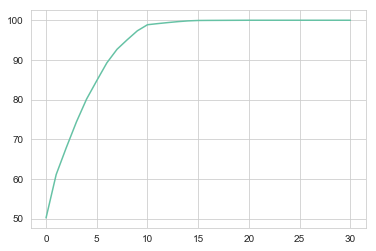

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 31)
pca.fit(data)
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)
plt.show()

In [44]:
pca = PCA(n_components = 12)
pca.fit(data)
pca_data = pca.fit_transform(data)

In [45]:
data.shape

(28659, 31)

In [46]:
target_attribute.shape

(28659,)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(pca_data, target_attribute, test_size=0.2)

In [48]:
X_train.shape

(22927, 12)

In [49]:
X_test.shape

(5732, 12)

In [50]:
clf = []
clf = SVC(kernel='poly')
clf.fit(X_train, y_train)
predicted_label = clf.predict(X_test)

In [96]:
Accuracy_Score = accuracy_score(y_test, predicted_label)
Precision_Score = precision_score(y_test, predicted_label,  average="macro")
Recall_Score = recall_score(y_test, predicted_label,  average="macro")
F1_Score = f1_score(y_test, predicted_label,  average="macro")

print('Average Accuracy: %0.2f +/- (%0.1f) %%' % (Accuracy_Score.mean()*100, Accuracy_Score.std()*100))
print('Average Precision: %0.2f +/- (%0.1f) %%' % (Precision_Score.mean()*100, Precision_Score.std()*100))
print('Average Recall: %0.2f +/- (%0.1f) %%' % (Recall_Score.mean()*100, Recall_Score.std()*100))
print('Average F1-Score: %0.2f +/- (%0.1f) %%' % (F1_Score.mean()*100, F1_Score.std()*100))
CM = confusion_matrix(y_test, predicted_label)
print(CM)


Average Accuracy: 81.18 +/- (0.0) %
Average Precision: 69.57 +/- (0.0) %
Average Recall: 60.13 +/- (0.0) %
Average F1-Score: 61.86 +/- (0.0) %
[[4366  231]
 [ 848  287]]


In [97]:
clf = []
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)
predicted_label = clf.predict(X_test)

In [98]:
Accuracy_Score = accuracy_score(y_test, predicted_label)
Precision_Score = precision_score(y_test, predicted_label,  average="macro")
Recall_Score = recall_score(y_test, predicted_label,  average="macro")
F1_Score = f1_score(y_test, predicted_label,  average="macro")

print('Average Accuracy: %0.2f +/- (%0.1f) %%' % (Accuracy_Score.mean()*100, Accuracy_Score.std()*100))
print('Average Precision: %0.2f +/- (%0.1f) %%' % (Precision_Score.mean()*100, Precision_Score.std()*100))
print('Average Recall: %0.2f +/- (%0.1f) %%' % (Recall_Score.mean()*100, Recall_Score.std()*100))
print('Average F1-Score: %0.2f +/- (%0.1f) %%' % (F1_Score.mean()*100, F1_Score.std()*100))
CM = confusion_matrix(y_test, predicted_label)
print(CM)
# fpr, tpr = metrics.roc_curve(y_test, predicted_label)
# print(metrics.auc(fpr, tpr))

Average Accuracy: 82.19 +/- (0.0) %
Average Precision: 73.56 +/- (0.0) %
Average Recall: 60.16 +/- (0.0) %
Average F1-Score: 62.10 +/- (0.0) %
[[4442  155]
 [ 866  269]]


In [99]:
def svc_param_selection(X, y, nfolds):
    Cs = [0.01, 0.1, 1]
    gammas = [0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [100]:
# print(svc_param_selection(X_train, y_train, 5))

In [101]:
clf = []
clf = SVC(kernel='rbf', C = 1, gamma = 0.1)
clf.fit(X_train, y_train)
predicted_label = clf.predict(X_test)

In [102]:
Accuracy_Score = accuracy_score(y_test, predicted_label)
Precision_Score = precision_score(y_test, predicted_label,  average="macro")
Recall_Score = recall_score(y_test, predicted_label,  average="macro")
F1_Score = f1_score(y_test, predicted_label,  average="macro")

print('Average Accuracy: %0.2f +/- (%0.1f) %%' % (Accuracy_Score.mean()*100, Accuracy_Score.std()*100))
print('Average Precision: %0.2f +/- (%0.1f) %%' % (Precision_Score.mean()*100, Precision_Score.std()*100))
print('Average Recall: %0.2f +/- (%0.1f) %%' % (Recall_Score.mean()*100, Recall_Score.std()*100))
print('Average F1-Score: %0.2f +/- (%0.1f) %%' % (F1_Score.mean()*100, F1_Score.std()*100))
CM = confusion_matrix(y_test, predicted_label)
print(CM)

Average Accuracy: 82.15 +/- (0.0) %
Average Precision: 73.36 +/- (0.0) %
Average Recall: 60.21 +/- (0.0) %
Average F1-Score: 62.15 +/- (0.0) %
[[4438  159]
 [ 864  271]]


In [103]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-2, hidden_layer_sizes=(10, 10), random_state=1)

In [104]:
clf.fit(X_train, y_train) 

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [105]:
Accuracy_Score = accuracy_score(y_test, predicted_label)
Precision_Score = precision_score(y_test, predicted_label,  average="macro")
Recall_Score = recall_score(y_test, predicted_label,  average="macro")
F1_Score = f1_score(y_test, predicted_label,  average="macro")

print('Average Accuracy: %0.2f +/- (%0.1f) %%' % (Accuracy_Score.mean()*100, Accuracy_Score.std()*100))
print('Average Precision: %0.2f +/- (%0.1f) %%' % (Precision_Score.mean()*100, Precision_Score.std()*100))
print('Average Recall: %0.2f +/- (%0.1f) %%' % (Recall_Score.mean()*100, Recall_Score.std()*100))
print('Average F1-Score: %0.2f +/- (%0.1f) %%' % (F1_Score.mean()*100, F1_Score.std()*100))
CM = confusion_matrix(y_test, predicted_label)
print(CM)

Average Accuracy: 82.15 +/- (0.0) %
Average Precision: 73.36 +/- (0.0) %
Average Recall: 60.21 +/- (0.0) %
Average F1-Score: 62.15 +/- (0.0) %
[[4438  159]
 [ 864  271]]


In [106]:
# Smote
from imblearn.over_sampling import SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 4558
Before OverSampling, counts of label '0': 18369 

After OverSampling, the shape of train_X: (36738, 12)
After OverSampling, the shape of train_y: (36738,) 

After OverSampling, counts of label '1': 18369
After OverSampling, counts of label '0': 18369


In [107]:
clf = []
clf = SVC(kernel='rbf')
clf.fit(X_train_res, y_train_res)
predicted_label = clf.predict(X_test)

In [108]:
Accuracy_Score = accuracy_score(y_test, predicted_label)
Precision_Score = precision_score(y_test, predicted_label,  average="macro")
Recall_Score = recall_score(y_test, predicted_label,  average="macro")
F1_Score = f1_score(y_test, predicted_label,  average="macro")

print('Average Accuracy: %0.2f +/- (%0.1f) %%' % (Accuracy_Score.mean()*100, Accuracy_Score.std()*100))
print('Average Precision: %0.2f +/- (%0.1f) %%' % (Precision_Score.mean()*100, Precision_Score.std()*100))
print('Average Recall: %0.2f +/- (%0.1f) %%' % (Recall_Score.mean()*100, Recall_Score.std()*100))
print('Average F1-Score: %0.2f +/- (%0.1f) %%' % (F1_Score.mean()*100, F1_Score.std()*100))
CM = confusion_matrix(y_test, predicted_label)
print(CM)

Average Accuracy: 76.48 +/- (0.0) %
Average Precision: 64.80 +/- (0.0) %
Average Recall: 67.02 +/- (0.0) %
Average F1-Score: 65.66 +/- (0.0) %
[[3801  796]
 [ 552  583]]


###### Logistic regression

In [109]:
clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)
predicted_label = clf.predict(X_test)

In [110]:
Accuracy_Score = accuracy_score(y_test, predicted_label)
Precision_Score = precision_score(y_test, predicted_label,  average="macro")
Recall_Score = recall_score(y_test, predicted_label,  average="macro")
F1_Score = f1_score(y_test, predicted_label,  average="macro")

print('Average Accuracy: %0.2f +/- (%0.1f) %%' % (Accuracy_Score.mean()*100, Accuracy_Score.std()*100))
print('Average Precision: %0.2f +/- (%0.1f) %%' % (Precision_Score.mean()*100, Precision_Score.std()*100))
print('Average Recall: %0.2f +/- (%0.1f) %%' % (Recall_Score.mean()*100, Recall_Score.std()*100))
print('Average F1-Score: %0.2f +/- (%0.1f) %%' % (F1_Score.mean()*100, F1_Score.std()*100))
CM = confusion_matrix(y_test, predicted_label)
print(CM)

Average Accuracy: 81.07 +/- (0.0) %
Average Precision: 71.27 +/- (0.0) %
Average Recall: 55.29 +/- (0.0) %
Average F1-Score: 55.06 +/- (0.0) %
[[4504   93]
 [ 992  143]]


In [111]:
clf = RandomForestClassifier(n_estimators=500, min_samples_leaf=5)
clf.fit(X_train,y_train)
predicted_label = clf.predict(X_test)

In [112]:
Accuracy_Score = accuracy_score(y_test, predicted_label)
Precision_Score = precision_score(y_test, predicted_label,  average="macro")
Recall_Score = recall_score(y_test, predicted_label,  average="macro")
F1_Score = f1_score(y_test, predicted_label,  average="macro")

print('Average Accuracy: %0.2f +/- (%0.1f) %%' % (Accuracy_Score.mean()*100, Accuracy_Score.std()*100))
print('Average Precision: %0.2f +/- (%0.1f) %%' % (Precision_Score.mean()*100, Precision_Score.std()*100))
print('Average Recall: %0.2f +/- (%0.1f) %%' % (Recall_Score.mean()*100, Recall_Score.std()*100))
print('Average F1-Score: %0.2f +/- (%0.1f) %%' % (F1_Score.mean()*100, F1_Score.std()*100))
CM = confusion_matrix(y_test, predicted_label)
print(CM)

Average Accuracy: 81.28 +/- (0.0) %
Average Precision: 69.89 +/- (0.0) %
Average Recall: 60.26 +/- (0.0) %
Average F1-Score: 62.04 +/- (0.0) %
[[4370  227]
 [ 846  289]]


##### Xgboost

In [113]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
num_round = 6
evallist  = [(dtest,'eval'), (dtrain,'train')]
param = {'objective':'binary:logistic', 'silent':1, 'eval_metric': ['error', 'logloss']}
clf = xgb.train( param, dtrain, num_round, evallist )

[0]	eval-error:0.181438	eval-logloss:0.576564	train-error:0.168099	train-logloss:0.570179
[1]	eval-error:0.181786	eval-logloss:0.515169	train-error:0.16426	train-logloss:0.503955
[2]	eval-error:0.181263	eval-logloss:0.480927	train-error:0.16426	train-logloss:0.465636
[3]	eval-error:0.180565	eval-logloss:0.460824	train-error:0.163083	train-logloss:0.441781
[4]	eval-error:0.182484	eval-logloss:0.449558	train-error:0.162385	train-logloss:0.426252
[5]	eval-error:0.181263	eval-logloss:0.443812	train-error:0.161382	train-logloss:0.416835


In [114]:
predicted_label = clf.predict(dtest)
predicted_label = [round(value) for value in predicted_label]

In [115]:
Accuracy_Score = accuracy_score(y_test, predicted_label)
Precision_Score = precision_score(y_test, predicted_label,  average="macro")
Recall_Score = recall_score(y_test, predicted_label,  average="macro")
F1_Score = f1_score(y_test, predicted_label,  average="macro")

print('Average Accuracy: %0.2f +/- (%0.1f) %%' % (Accuracy_Score.mean()*100, Accuracy_Score.std()*100))
print('Average Precision: %0.2f +/- (%0.1f) %%' % (Precision_Score.mean()*100, Precision_Score.std()*100))
print('Average Recall: %0.2f +/- (%0.1f) %%' % (Recall_Score.mean()*100, Recall_Score.std()*100))
print('Average F1-Score: %0.2f +/- (%0.1f) %%' % (F1_Score.mean()*100, F1_Score.std()*100))
CM = confusion_matrix(y_test, predicted_label)
print(CM)

Average Accuracy: 81.87 +/- (0.0) %
Average Precision: 72.01 +/- (0.0) %
Average Recall: 60.43 +/- (0.0) %
Average F1-Score: 62.36 +/- (0.0) %
[[4410  187]
 [ 852  283]]


In [116]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout

In [128]:
input_dim = X_train.shape[1]

model = Sequential()
model.add(Dense(256, input_shape=(input_dim,), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1,  activation='sigmoid'))

In [129]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [130]:
from keras.callbacks import Callback

class BatchLogger(Callback):
    def on_train_begin(self, epoch, logs={}):
        self.log_values = {}
        for k in self.params['metrics']:
            self.log_values[k] = []

    def on_epoch_end(self, batch, logs={}):
        for k in self.params['metrics']:
            if k in logs:
                self.log_values[k].append(logs[k])
    
    def get_values(self, metric_name, window):
        d =  pd.Series(self.log_values[metric_name])
        return d.rolling(window,center=False).mean()

bl = BatchLogger()

In [131]:
history = model.fit(
              np.array(X_train), np.array(y_train),
              batch_size=25, epochs=5, verbose=1, callbacks=[bl],
              validation_data=(np.array(X_test), np.array(y_test)))

Train on 22927 samples, validate on 5732 samples
Epoch 1/5
22927/22927 [==============================] - 4s 181us/step - loss: 0.4437 - acc: 0.8204 - val_loss: 0.4465 - val_acc: 0.8145
Epoch 2/5
22927/22927 [==============================] - 4s 161us/step - loss: 0.4335 - acc: 0.8252 - val_loss: 0.4415 - val_acc: 0.8179
Epoch 3/5
22927/22927 [==============================] - 3s 131us/step - loss: 0.4314 - acc: 0.8269 - val_loss: 0.4380 - val_acc: 0.8205
Epoch 4/5
22927/22927 [==============================] - 3s 125us/step - loss: 0.4290 - acc: 0.8271 - val_loss: 0.4392 - val_acc: 0.8240
Epoch 5/5
22927/22927 [==============================] - 3s 122us/step - loss: 0.4284 - acc: 0.8271 - val_loss: 0.4407 - val_acc: 0.8226


In [132]:
score = model.evaluate(np.array(X_test), np.array(y_test), verbose=0)
print('Test log loss:', score[0])
print('Test accuracy:', score[1])

Test log loss: 0.4407078024813618
Test accuracy: 0.8225750174459177


### Appendix

Text(0.5,1,'Class Counts')

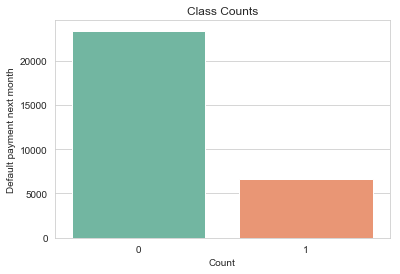

In [122]:
ax = sns.countplot(x = "defaultp_next_month", data = credit_data)
ax.set(xlabel='Count', ylabel='Default payment next month')
plt.title("Class Counts")

In [123]:
eda_credit_data["defaultp_next_month"].value_counts()[1] / eda_credit_data["defaultp_next_month"].count() *  100

22.12

In [124]:
eda_credit_data["defaultp_next_month"].value_counts()[1]

6636

##### The data set is imbalanced. There are only around 22% of defaulters instant

Text(0.5,1,'Gender Counts')

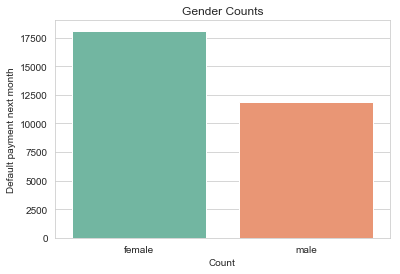

In [125]:
ax = sns.countplot(x = "gender", data = credit_data)
ax.set(xlabel='Count', ylabel='Default payment next month')
plt.title("Gender Counts")

##### There are more number of females then males in our dataset

Text(0.5,0,'Overall Credit')

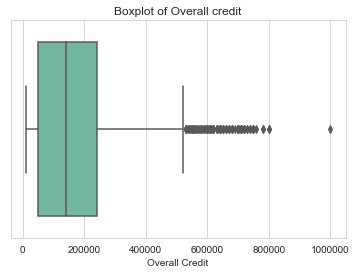

In [126]:
sns.boxplot( credit_data.overall_credit)
plt.title( "Boxplot of Overall credit")
plt.xlabel( "Overall Credit")

Text(0.5,0,'Amount of Paid Payment in September')

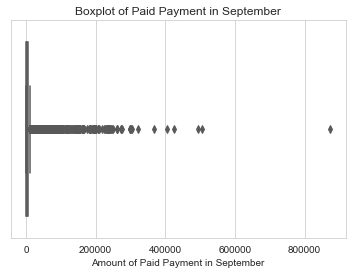

In [127]:
sns.boxplot( eda_credit_data.pp_sept)
plt.title( "Boxplot of Paid Payment in September")
plt.xlabel("Amount of Paid Payment in September")